In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lifelines

c:\Users\sarah\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#Load training data
train=pd.read_csv('training_data.csv')
train

<ipython-input-2-4f7ca5cf29bc>:2: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('training_data.csv')


,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,0.0,T,1,0,A,1.0,641-660,NaN,41,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,A
5758219,1.0,I,1,0,A,1.0,701-720,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,C
5758220,1.0,R,1,0,I 0-6,1.0,741-760,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B
5758221,0.0,T,1,0,Recovery,1.0,681-700,NaN,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B


In [3]:
#Choose subset of training data to experiment with
train_subset=train.sample(n=10000)

In [4]:
#Keep only relevant columns
train_subset=train_subset[['mob','charge_off']]

In [5]:
#Check to make sure some charge offs are included
train_subset['charge_off'].value_counts()

0    9970
1      30
Name: charge_off, dtype: int64

In [6]:
train_subset

,mob,charge_off
5026736,9,0
2016484,47,0
780289,82,0
1847619,26,0
3793718,5,0
...,...,...
233480,37,0
1455161,11,0
3851124,34,0
689393,7,0


In [7]:
train_subset.dtypes

mob           int64
charge_off    int64
dtype: object

In [8]:
#Survival table using whole training set
from lifelines.utils import survival_table_from_events

table=survival_table_from_events(train['mob'],train['charge_off'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5758223,5758223
2.0,116011,273,115738,0,5758223
3.0,117601,315,117286,0,5642212
4.0,114426,355,114071,0,5524611
5.0,112945,352,112593,0,5410185
...,...,...,...,...,...
830.0,11,0,11,0,51
832.0,18,0,18,0,40
835.0,6,0,6,0,22


# Kaplan-Meier

In [9]:
from lifelines import KaplanMeierFitter
kmf=KaplanMeierFitter()
kmf.fit(train['mob'],event_observed=train['charge_off'])
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
2.0,0.999953
3.0,0.999897
4.0,0.999833
5.0,0.999767
...,...
830.0,0.989351
832.0,0.989351
835.0,0.989351


<AxesSubplot:xlabel='timeline'>

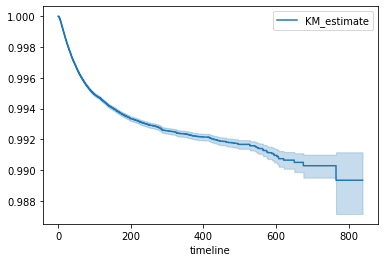

In [10]:
kmf.plot_survival_function()

# Hazard rate using Nelson Aalen Estimate

In [11]:
from lifelines import NelsonAalenFitter
naf=NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(train['mob'],event_observed=train['charge_off'])
naf.cumulative_hazard_

c:\Users\sarah\anaconda3\lib\site-packages\lifelines\fitters\nelson_aalen_fitter.py:175: RuntimeWarning: overflow encountered in exp
  df[ci_labels[1]] = cum_hazard_ * np.exp(z * np.sqrt(cumulative_sq_) / np.where(cum_hazard_ == 0, 1, cum_hazard_))


,NA_estimate
timeline,
0.0,0.000000
2.0,0.000047
3.0,0.000103
4.0,0.000167
5.0,0.000233
...,...
830.0,0.010705
832.0,0.010705
835.0,0.010705


<AxesSubplot:xlabel='timeline'>

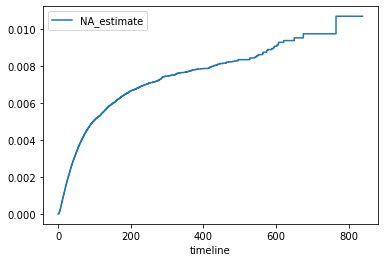

In [12]:
naf.plot_cumulative_hazard()

# Survival Regression

In [15]:
#Adding in fico score column, mapping to int(0-11 lowest to highest), and dropping rows with missing scores
train_subset_reg=train[['mob','charge_off','bank_fico_buckets_20']]
train_subset_reg=train_subset_reg[(train_subset_reg.bank_fico_buckets_20!= 'Missing') & (train_subset_reg.bank_fico_buckets_20!= 'Exception')]
codes = {'<= 560':0, '561-580':1, '581-600':2,'601-620':3,'621-640':4,'641-660':5, '661-680':6, '681-700':7, '701-720':8, '721-740':9, '741-760':10, '761+':11 }
train_subset_reg['bank_fico_buckets_20_map'] = train_subset_reg['bank_fico_buckets_20'].map(codes)

#Also adding a column with low/high (0/1) credit score (using 661 and up as high based off a quick google search)
codes_low_high = {'<= 560':1, '561-580':1, '581-600':1,'601-620':1,'621-640':1,'641-660':1, '661-680':0, '681-700':0, '701-720':0, '721-740':0, '741-760':0, '761+':0 }
train_subset_reg['fico_low_high'] = train_subset_reg['bank_fico_buckets_20'].map(codes_low_high)
train_subset_reg

,mob,charge_off,bank_fico_buckets_20,bank_fico_buckets_20_map,fico_low_high
0,3,0,581-600,2,1
1,159,0,721-740,9,0
2,22,0,761+,11,0
3,16,0,761+,11,0
4,3,0,721-740,9,0
...,...,...,...,...,...
5758218,41,0,641-660,5,1
5758219,47,0,701-720,8,0
5758220,34,0,741-760,10,0
5758221,50,0,681-700,7,0


# Cox Proportional Hazard

In [16]:
from lifelines import CoxPHFitter
cph=CoxPHFitter()
cph.fit(train_subset_reg[['mob','charge_off','fico_low_high']],duration_col='mob',event_col='charge_off')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5.71961e+06 total observations, 5.70412e+06 right-censored observations>
             duration col = 'mob'
                event col = 'charge_off'
      baseline estimation = breslow
   number of observations = 5.71961e+06
number of events observed = 15484
   partial log-likelihood = -216677.13
         time fit was run = 2023-03-25 05:18:53 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
fico_low_high   2.75      15.61       0.02             2.71             2.79                15.03                16.22

                cmp to      z      p   -log2(p)
covariate                                      
fico_low_high     0.00 142.00 <0.005        inf
---
Concordance = 0.80
Partial AIC = 433356.27
log-likelihood ratio test = 25862.27 on 1 df
-log2(p) of ll-ratio test = inf

In [ ]:
#15.61 times more likely to have charge off if low credit score (<=660) w/ p- value less then .05 (means statistically significant)